# **Sentiment Classification**

In this notebook, we will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

The initial cells include code for importing data and setting up the environment. This notebook follows a question and answering format, where we first present a question and then attempt to provide an answer for it.

In this notebook, we will utilize the movie_reviews dataset from NLTK, which is a well-known toolkit for natural language processing. This dataset consists of 2,000 movie reviews that have been categorized into two classes: positive and negative. Each review is labeled according to the sentiment conveyed in the text.

The movie_reviews dataset is widely employed in sentiment analysis and text classification tasks. It offers a balanced selection of reviews covering various movie genres, presenting a diverse range of opinions and perspectives.

By utilizing this dataset, we can train and evaluate machine learning models specifically designed for sentiment analysis in the domain of movie reviews. The goal is to classify the sentiment of the reviews as either positive or negative.

Throughout this notebook, we will leverage the movie_reviews dataset to perform sentiment classification on movie reviews, utilizing the power of NLTK for natural language processing tasks.

In [ ]:
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [ ]:
random.seed(260830)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0]) # Checking the type of data training data returns

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['denzel', 'washington', 'is', 'among', 'the', 'many', ...], 'pos')


In [ ]:
print("Training data",training_data)
print("Testing data",testing_data)

Training data [(['denzel', 'washington', 'is', 'among', 'the', 'many', ...], 'pos'), (['it', 'is', 'simply', 'amazing', 'how', '"', 'the', ...], 'pos'), (['after', 'having', 'heard', 'so', 'many', 'critics', ...], 'pos'), (['wow', '!', 'what', 'a', 'movie', '.', 'it', "'", 's', ...], 'pos'), (['richard', 'gere', 'can', 'be', 'a', 'commanding', ...], 'pos'), (['while', 'screen', 'adaptations', 'of', 'john', ...], 'pos'), (['meet', 'joe', 'black', '(', 'reviewed', 'on', 'nov', ...], 'pos'), (['scream', '2', 'isn', "'", 't', 'quite', 'as', ...], 'pos'), (['i', 'know', 'it', 'already', 'opened', 'in', ...], 'pos'), (['the', 'trailers', 'and', 'the', 'beginning', 'of', ...], 'pos'), (['susan', 'granger', "'", 's', 'review', 'of', '"', ...], 'pos'), (['after', 'bloody', 'clashes', 'and', 'independence', ...], 'pos'), (['when', 'i', 'saw', 'the', 'trailer', 'for', '"', ...], 'pos'), (['capsule', ':', 'the', 'world', 'will', 'come', 'to', ...], 'pos'), (['based', 'on', 'the', 'relatively', 'un

1)
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explaination**

## **1) a)**

In [ ]:
print(movie_reviews.categories())  #Firstly getting all the categories in dataset

['neg', 'pos']


In [ ]:
pos_review_ids=movie_reviews.fileids('pos')
neg_review_ids=movie_reviews.fileids('neg')

print(f"The number of positive reviews is {len(pos_review_ids)}")
print(f"The number of negative reviews is {len(neg_review_ids)}")  # The numbers below display that this a balanced dataset as it contains equal number of positive and negative reviews

The number of positive reviews is 1000
The number of negative reviews is 1000


In [ ]:
import random
wordlist_pos_reviews=[]
wordlist_neg_reviews=[]

def gen_sample_of_words(data_indices,n=10):
  random.seed(11)                                                       #Sets the random seed for data so that it produces same data
  unique_sample=random.sample(data_indices,n)                           #Getting the 10 indices from data_indices
  #print(list(movie_reviews.words(pos_review_ids[0])))
  word_list=[]
  for index in unique_sample:
    word_list.extend(list(movie_reviews.words(index)))                  #extend will store the data of that particular index in same list
  unique_words=[word.lower() for word in word_list if word.isalpha()]   #Check if word is alphabetic store in unique_words
  unique_words=list(set(unique_words))                                  #Generate list of unique words
  # print(unique_words)
  return unique_words[:n]                                               # Return first 10 words in a list

In [ ]:
wordlist_pos_reviews=gen_sample_of_words(pos_review_ids)
print(f"The word list for positive reviews is: {wordlist_pos_reviews}")

The word list for positive reviews is: ['protect', 'antonio', 'aliens', 'background', 'figure', 'purists', 'prostitution', 'book', 'through', 'cultural']


## **1) b)**

In [ ]:
wordlist_neg_reviews=gen_sample_of_words(neg_review_ids)
print(f"The word list for negative reviews is: {wordlist_neg_reviews}")

The word list for negative reviews is: ['leoni', 'coast', 'deck', 'listed', 'whitney', 'cameron', 'figure', 'factors', 'hathaway', 'arguing']


## **1)c)**

**Explanation:**

I have generated a word list of 10 unique words by using the function **gen_sample_of_words** by first getting the indices of categories which is postitive and negative here. Then randomly selecting the index from the given category and generating a list of unique words by filtering only alphabetic words from the list. This generates a unique sample of words from the corpus of words in that review category and will help us in getting the broader picture of what kind of words are included in that category.

This list will also help us to give the sample list of positive and negative words to train our word list based classifier.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explaination**



## **2)a)**

In [ ]:
# def most_recurring_words(posfreq,negfreq,topk):
#     difference=posfreq-negfreq
#     # print(difference)
#     sorted_difference=difference.most_common() # most_common method from the FreqDist class - this returns a list of word, frequency pairs ordered by frequency.
#     # print(sorteddiff)
#     just_words=[word for (word,freq) in sorted_difference[:topk]]
#     return just_words

In [ ]:
from nltk.classify.api import ClassifierI

class Word_list_cf(ClassifierI):

    def __init__(self, pos, neg):
      self._pos_words = pos
      self._neg_words = neg

    def classify_document(self, doc):
        score = 0

        # For each document if word is in positive list it will increase the score and if it occurs in negative list it will decrease the score
        for word, value in doc.items():
          if word in self._pos_words:
            score+=1
          if word in self._neg_words:
            score-=1

        #If score is less than 0 return negative as a category of word, if it greater than 0 return positive if it is equals 0 return random from given choices pos, neg
        if score < 0:
          return "neg"
        elif score>0:
          return "pos"
        else:
          random_outcome=random.choice(["pos","neg"])
          return random_outcome

    def train(self,training_data):

      positive_freq_dist=FreqDist()
      negative_freq_dist=FreqDist()

      for review_Dist,label in training_data:
        if label=='pos':
          positive_freq_dist+=review_Dist
        else:
          negative_freq_dist+=review_Dist

    def classify_many(self, docs):
       return [self.classify_document(doc) for doc in docs]

    def labels(self):
        return ("pos", "neg")

In [ ]:
movie_review_classifier= Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews)
print(movie_review_classifier)

## **2)b)**

**Explanation:**


We must import the base model from nltk.classify.api to build our classifier then we create a classify_document method in this class called Word_List_cf. In the method classify_document we take a single document as input and if the word occurs in the positive word list which we have already created in 1) a) the score for the document will increase and negative word list which we created in 1) b) the score for that document will decrease.Now if score is less than 0, we classify that document as negative, if score is greater than 0 we classify that document as positive if in case score is 0, we will give our decision for that document based on by random choice.

classify_many helps us classify each document by using method classify_document
for each document.

We take positive word_list and negative word list to initialize our classifier list and train it on the given words.



3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

In [ ]:
class CalculateConfusionMatrix:
    def __init__(self,predictions,real_value,classes=("pos","neg")):

        (self.class1,self.class2)=classes
        self.true_positive=0
        self.false_positive=0
        self.false_negative=0
        self.true_negative=0

        for predicted_value,actual_value in zip(predictions,real_value):
            if actual_value==self.class1:
                if predicted_value==self.class1:
                    self.true_positive+=1
                else:
                    self.false_negative+=1

            elif predicted_value==self.class1:
                self.false_positive+=1
            else:
                self.true_negative+=1

        self.accuracy_of_classifier=self.calculate_accuracy()
        self.precision_score=self.calculate_precision()
        self.recall_score=self.calculate_recall()
        self.f1_score=self.calculate_f1()

    def calculate_accuracy(self):
        #Accuracy=(True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
        a=(self.true_positive +self.true_negative)/(self.true_positive +self.true_negative +self.false_positive+self.false_negative)
        self.a=a
        return round(a,4)

    def calculate_precision(self):
        #Precision = True Positives /(True Positives + False Positives), Denominator in precision denotes Total Predicted Positive
        p=self.true_positive/(self.true_positive + self.false_positive)
        self.p=p
        return round(p,4)

    def calculate_recall(self):
        #Recall= True Positives/(True Positives + False Negatives ), Denominator denotes Total Actual Positive
        r=self.true_positive/(self.true_positive + self.false_negative)
        self.r=r
        return round(r,4)

    def calculate_f1(self):
        #F1=2*precison*recall/precision+recall
        f1=(2*self.p*self.r)/(self.p+self.r)
        return round(f1,4)

In [ ]:
stop_words = stopwords.words('english')

def normalise_and_remove_stopwords(wordlist):
  lowered_list=[word.lower() for word in wordlist]      # case_normalization that is converting all words to lower case
  filtered_data=[word for word in lowered_list if word.isalpha() and word not in stop_words]  #Removing stop words
  return filtered_data

In [ ]:

training_normalized=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in training_data]
testing_normalized=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in testing_data]
print(training_normalized[0])
print(testing_normalized[0])

(FreqDist({'carter': 22, 'washington': 10, 'film': 7, 'prison': 6, 'actors': 5, 'see': 5, 'denzel': 4, 'hurricane': 4, 'life': 4, 'white': 4, ...}), 'pos')
(FreqDist({'film': 5, 'families': 4, 'first': 3, 'romeo': 3, 'juliet': 3, 'younger': 3, 'love': 3, 'another': 2, 'shakespeare': 2, 'wrong': 2, ...}), 'pos')


In [ ]:
docs,actual_labels=zip(*testing_normalized)
print(docs)
print(actual_labels)

(FreqDist({'film': 5, 'families': 4, 'first': 3, 'romeo': 3, 'juliet': 3, 'younger': 3, 'love': 3, 'another': 2, 'shakespeare': 2, 'wrong': 2, ...}), FreqDist({'tribe': 8, 'krippendorf': 6, 'shelmikedmu': 4, 'film': 4, 'seem': 3, 'however': 3, 'one': 3, 'professor': 3, 'kids': 3, 'humor': 3, ...}), FreqDist({'hilary': 5, 'musicians': 4, 'watson': 4, 'script': 4, 'movie': 3, 'one': 3, 'together': 3, 'jackie': 3, 'griffiths': 3, 'du': 3, ...}), FreqDist({'lumumba': 13, 'story': 7, 'patrice': 6, 'peck': 5, 'man': 4, 'belgian': 4, 'country': 4, 'life': 4, 'first': 3, 'government': 3, ...}), FreqDist({'george': 12, 'life': 10, 'film': 10, 'movie': 10, 'time': 7, 'christmas': 6, 'good': 5, 'however': 5, 'clarence': 5, 'family': 5, ...}), FreqDist({'cinque': 5, 'one': 4, 'slave': 4, 'spielberg': 3, 'slavery': 3, 'characters': 3, 'real': 3, 'life': 3, 'movie': 2, 'story': 2, ...}), FreqDist({'film': 10, 'metal': 6, 'music': 6, 'band': 6, 'heavy': 4, 'singer': 4, 'like': 4, 'one': 4, 'also': 4,

In [ ]:
movie_review_classifier= Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews)
print(movie_review_classifier)
movie_review_classifier.train(training_normalized)

confusion_matrix=CalculateConfusionMatrix(movie_review_classifier.classify_many(docs),actual_labels)

print("True Positive are: ",confusion_matrix.true_positive)
print("False Positive are: ",confusion_matrix.false_positive)
print("True Negative are: ",confusion_matrix.true_negative)
print("False Negative are: ",confusion_matrix.false_negative)

print("Accuracy of classifier is ",confusion_matrix.calculate_accuracy())
print("Precision of classifier is ",confusion_matrix.calculate_precision())
print("Recall of classifier is ",confusion_matrix.calculate_recall())
print("F1 Score of classifier is ",confusion_matrix.calculate_f1())

True Positive are:  176
False Positive are:  185
True Negative are:  115
False Negative are:  124
Accuracy of classifier is  0.485
Precision of classifier is  0.4875
Recall of classifier is  0.5867
F1 Score of classifier is  0.5325


## **3)b)**

**Explanation:**

We first normalise the data by using case normalization and removing stopwords by using function normalise_and_remove_stopwords. We might not always need to distinguish words in uper and lower case. Also, this will unnecessarily increase the size of our word list in each document and frequency for that will be distributed in uper and lower case words, although it is a same word.

We have stored normalized training data in training_normalized and normalized test data in testing_normalized which has all the documents in word, frequency from with the tagged label. With the help of zip(*iterable) we assign testing documents in docs and labels in actual_labels.

In the Class CalculateConfusionMatrix we pass predictions from our movie_review_classifier in the CalculateConfusionMatrix along with the actual_labels we then create different methods for Accuracy, Precision, Recall, F1 Score which we calculate on the basis of the below given formulas.


We want to always maximize True Positives and True Negatives and minimize False Positives and False Negatives.

---
**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is true and the value of predicted class is also true.

E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

**True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

**False Positives (FP)** – When actual class is false and predicted class is true.

E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

**False Negatives (FN) ** – When actual class is true but predicted class is false.

 E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

---

### **Accuracy**

1.    Accuracy is a  ratio of correctly predicted observation to the total observations.
2.    Formula for accuracy is as follows:

              Accuracy=(True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
3.   It is great measure but only when we have symmetric datasets where values of false positive and false negatives are almost equal in size.
4. Example: in case we get accuracy=0.95 . It means that our model has 95% accuracy approximately.
Example: If there are 50 % girls and 50% boys in the class and we want to classify the pass and fail for whole class. In this case, we can use accuracy.
5. Accuracy is useful when the target class is well balanced but is not a good choice with unbalanced classes.

---
### **Precision**

1. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
2. Formula for precision is as follows: True Positive/Actual Results

        Precision = True Positives /(True Positives + False Positives)

(Denominator in precision denotes Total Predicted Positive)
3. By using precision, we can measure the model's ability to classify the positive samples.In Precision, all positive samples that are classified as positive should be considered either correctly or incorrectly.
4. The question precision answers is that take the question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
5. Another example could be If we want to classify good and bad content videos for childrens, We'll be fine if the model rejects some of the good videos, but it will be not okay for us if model shows bad videos.
So, in this case we need high precision.That means accuracy is not the correct metrics to be chosen for this scenario.
---

### **Recall**

1. Recall is the ratio of correctly predicted positive observations to the all observations in actual class . It is also called as **Sensitivity**.
2. Formula for Recall  is as follows: True Positive/Predicted Results

        Recall= True Positives/(True Positives + False Negatives )

(Denominator denotes Total Actual Positive)
3. This metric helps us to determine how many positive samples has been correctly classified.It cares about accurately classifying all positive samples. It doesn't care if any negative samples are classified as positive.
4. The question recall answers is that Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

---
### **F1 Score**

1. It is a harmonic mean between precision and recall. It tries out to balance these two performance metrics.
2. Formula for F1 Score is as follows:

            F1=(2*precison*recall)/(precision+recall)
3. F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.




Note: There is always a trade-off between precision and recall.


**Or performance metrics should be chosen according to what problem we are trying to solve or what is our use case.**

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

# **4)a)**

In [ ]:
from nltk.classify import NaiveBayesClassifier

nltk_naivebayes_cf=NaiveBayesClassifier.train(training_normalized)

In [ ]:
nltk_naivebayes_cf.classify_many(docs)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


Analyzing the performance of Naive Bayes Classifier with the help of CalculateConfusionMatrix class.

In [ ]:
confusion_matrix_nb=CalculateConfusionMatrix(nltk_naivebayes_cf.classify_many(docs),actual_labels,classes=('pos','neg'))

print("True Positive in Naive Bayes are: ",confusion_matrix_nb.true_positive)
print("False Positive in Naive Bayes are: ",confusion_matrix_nb.false_positive)
print("True Negative in Naive Bayes are: ",confusion_matrix_nb.true_negative)
print("False Negative in Naive Bayes are: ",confusion_matrix_nb.false_negative)

print("Accuracy for Naive Bayes classifier is ",confusion_matrix_nb.calculate_accuracy())
print("Precision for Naive Bayes classifier is ",confusion_matrix_nb.calculate_precision())
print("Recall for Naive Bayes classifier is ",confusion_matrix_nb.calculate_recall())
print("F1 Score for Naive Bayes classifier is ",confusion_matrix_nb.calculate_f1())

True Positive in Naive Bayes are:  298
False Positive in Naive Bayes are:  191
True Negative in Naive Bayes are:  109
False Negative in Naive Bayes are:  2
Accuracy for Naive Bayes classifier is  0.6783
Precision for Naive Bayes classifier is  0.6094
Recall for Naive Bayes classifier is  0.9933
F1 Score for Naive Bayes classifier is  0.7554


# **4)b)**

In [ ]:
wl_movie_review_classifier= Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews)
wl_movie_review_classifier.train(training_normalized)

confusion_matrix_wordlist=CalculateConfusionMatrix(wl_movie_review_classifier.classify_many(docs),actual_labels)

print("True Positive in Word List Classifier are: ",confusion_matrix_wordlist.true_positive)
print("False Positive in Word List Classifier are: ",confusion_matrix_wordlist.false_positive)
print("True Negative in Word List Classifier are: ",confusion_matrix_wordlist.true_negative)
print("False Negative in Word List Classifier are: ",confusion_matrix_wordlist.false_negative)

print("Accuracy for Word List classifier is ",confusion_matrix_wordlist.calculate_accuracy())
print("Precision for Word List classifier is ",confusion_matrix_wordlist.calculate_precision())
print("Recall for Word List classifier is ",confusion_matrix_wordlist.calculate_recall())
print("F1 Score for Word List classifier is ",confusion_matrix_wordlist.calculate_f1())

True Positive in Word List Classifier are:  153
False Positive in Word List Classifier are:  176
True Negative in Word List Classifier are:  124
False Negative in Word List Classifier are:  147
Accuracy for Word List classifier is  0.4617
Precision for Word List classifier is  0.465
Recall for Word List classifier is  0.51
F1 Score for Word List classifier is  0.4865


In [ ]:
nltk_naivebayes_cf.classify_many(docs)
nltk_naivebayes_cf=NaiveBayesClassifier.train(training_normalized)

In [ ]:
wl_movie_review_classifier= Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews)
wl_movie_review_classifier.train(training_normalized)

confusion_matrix_wordlist=CalculateConfusionMatrix(wl_movie_review_classifier.classify_many(docs),actual_labels)

print("True Positive in Word List Classifier are: ",confusion_matrix_wordlist.true_positive)
print("False Positive in Word List Classifier are: ",confusion_matrix_wordlist.false_positive)
print("True Negative in Word List Classifier are: ",confusion_matrix_wordlist.true_negative)
print("False Negative in Word List Classifier are: ",confusion_matrix_wordlist.false_negative)

print("Accuracy for Word List classifier is ",confusion_matrix_wordlist.calculate_accuracy())
print("Precision for Word List classifier is ",confusion_matrix_wordlist.calculate_precision())
print("Recall for Word List classifier is ",confusion_matrix_wordlist.calculate_recall())
print("F1 Score for Word List classifier is ",confusion_matrix_wordlist.calculate_f1())

True Positive in Word List Classifier are:  167
False Positive in Word List Classifier are:  170
True Negative in Word List Classifier are:  130
False Negative in Word List Classifier are:  133
Accuracy for Word List classifier is  0.495
Precision for Word List classifier is  0.4955
Recall for Word List classifier is  0.5567
F1 Score for Word List classifier is  0.5243


The accuracy of Word_List_Classifier classifier is 0.4917
The precision of Word_List_Classifier classifier is 0.4924
The recall of Word_List_Classifier classifier is 0.5433
The F1 Score of Word_List_Classifier classifier is 0.5166
The accuracy of Naive_Bayes_Classifier classifier is 0.915
The precision of Naive_Bayes_Classifier classifier is 0.8547
The recall of Naive_Bayes_Classifier classifier is 1.0
The F1 Score of Naive_Bayes_Classifier classifier is 0.9217
The accuracy of Word_List_Classifier classifier is 0.5333
The precision of Word_List_Classifier classifier is 0.5278
The recall of Word_List_Classifier classifier is 0.6333
The F1 Score of Word_List_Classifier classifier is 0.5758
The accuracy of Naive_Bayes_Classifier classifier is 0.9017
The precision of Naive_Bayes_Classifier classifier is 0.8394
The recall of Naive_Bayes_Classifier classifier is 0.9933
The F1 Score of Naive_Bayes_Classifier classifier is 0.9099
The accuracy of Word_List_Classifier classifier is 0.52
The prec

,0,1
0,Word_List_Classifier,0.50532
1,Naive_Bayes_Classifier,0.89868


Accuracy


,0,1
0,Word_List_Classifier,0.50454
1,Naive_Bayes_Classifier,0.83356


Precision


,0,1
0,Word_List_Classifier,0.58466
1,Naive_Bayes_Classifier,0.99666


Recall


,0,1
0,Word_List_Classifier,0.54152
1,Naive_Bayes_Classifier,0.90780


F1 Score


(0.0, 1.0)

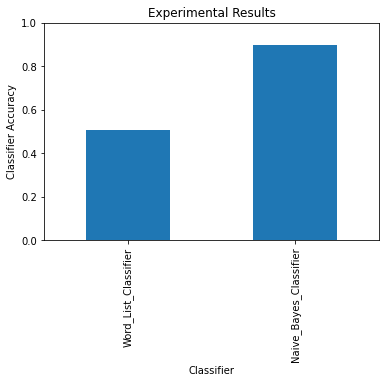

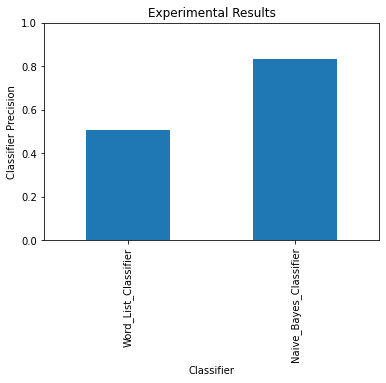

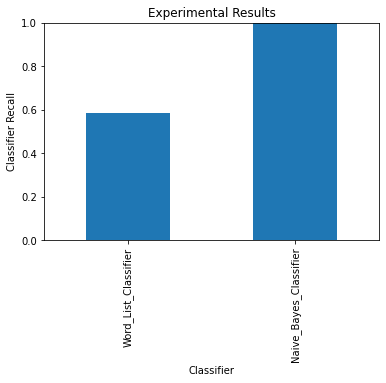

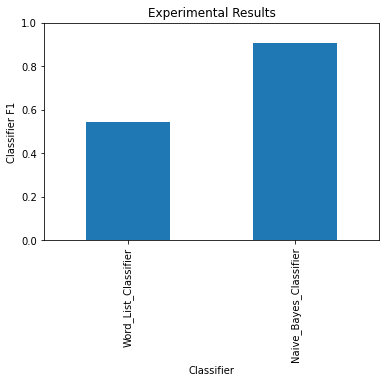

In [ ]:
word_list_size = 100

classifiers={"Word_List_Classifier":Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews),
             "Naive_Bayes_Classifier":NaiveBayesClassifier.train(training_normalized)}

number_of_runs=5
results_accuracy={}
results_precision={}
results_recall={}
results_f1={}

for key in classifiers.keys():
    results_accuracy[key]=0
    results_precision[key]=0
    results_recall[key]=0
    results_f1[key]=0

for i in range(number_of_runs):
    training,testing=get_train_test_data()
    training_norm_data=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in training]
    testing_norm_data=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in testing]
    docs,labels=zip(*testing_norm_data)

    for name,classifier in classifiers.items():
        classifier.train(training_norm_data)

        senti_confusionmatrix=CalculateConfusionMatrix(classifier.classify_many(docs),labels)

        #Accuracy
        print("The accuracy of {} classifier is {}".format(name,senti_confusionmatrix.calculate_accuracy()))
        results_accuracy[name]=results_accuracy[name]+(senti_confusionmatrix.calculate_accuracy()/number_of_runs)

        #Precision
        print("The precision of {} classifier is {}".format(name,senti_confusionmatrix.calculate_precision()))
        results_precision[name]=results_precision[name]+(senti_confusionmatrix.calculate_precision()/number_of_runs)

        #Recall
        print("The recall of {} classifier is {}".format(name,senti_confusionmatrix.calculate_recall()))
        results_recall[name]=results_recall[name]+(senti_confusionmatrix.calculate_recall()/number_of_runs)

        #F1 Score
        print("The F1 Score of {} classifier is {}".format(name,senti_confusionmatrix.calculate_f1()))
        results_f1[name]=results_f1[name]+(senti_confusionmatrix.calculate_f1()/number_of_runs)

df_accuracy= pd.DataFrame(list(results_accuracy.items()))
display(df_accuracy)
print("Accuracy")
set_ax_1 = df_accuracy.plot.bar(title="Experimental Results",legend=False,x=0)
set_ax_1.set_ylabel("Classifier Accuracy")
set_ax_1.set_xlabel("Classifier")
set_ax_1.set_ylim(0,1.0)

df_precision= pd.DataFrame(list(results_precision.items()))
display(df_precision)
print("Precision")
set_ax_2 = df_precision.plot.bar(title="Experimental Results",legend=False,x=0)
set_ax_2.set_ylabel("Classifier Precision")
set_ax_2.set_xlabel("Classifier")
set_ax_2.set_ylim(0,1.0)

df_recall = pd.DataFrame(list(results_recall.items()))
display(df_recall)
print("Recall")
set_ax_3 = df_recall.plot.bar(title="Experimental Results",legend=False,x=0)
set_ax_3.set_ylabel("Classifier Recall")
set_ax_3.set_xlabel("Classifier")
set_ax_3.set_ylim(0,1.0)

df_f1 = pd.DataFrame(list(results_f1.items()))
display(df_f1)
print("F1 Score")
set_ax_4 = df_f1.plot.bar(title="Experimental Results",legend=False,x=0)
set_ax_4.set_ylabel("Classifier F1")
set_ax_4.set_xlabel("Classifier")
set_ax_4.set_ylim(0,1.0)

**Explanation:**

We have first constructed naive bayes classifier with the help of NLTK and calculated its performance metrics.

To compare our word list classifier and Naive Bayes Classifier we take the average of all the performance metrics for both the classifier where number_of_runs is taken as 5.So that in case if machine is busy in some other task it will not impact the average performance of classifier and its metric score. We then pass the normalized data to the classifiers and then train and test the results for Word Based Classifier and Naive Bayes Classifier.

For both the classifier we calculate the performance metrics and store in the results ditionary related to that performance metrics.

With the help of pandas.df.plot.bar function we plot the average of performance metrics for both the classifiers.

We can clearly see that Naive Bayes Classifier is better than our Word_List_Classifier in all the performance metrics (Accuracy, Precision, Recall, F1 Score).

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.


# **5)a)**

In [ ]:
from random import sample

sample_sizes_for_classifier=[5,100,200,300,500,600]
results={}

classifier_name={"Word_List_MF":Word_list_cf(wordlist_pos_reviews,wordlist_neg_reviews)}

for size in sample_sizes_for_classifier:
    short_result={}

    for i in range(number_of_runs):
        training,testing=get_train_test_data()
        training_norm_data=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in training]
        testing_norm_data=[(FreqDist(normalise_and_remove_stopwords(wordlist)),label) for (wordlist,label) in testing]
        docs,labels=zip(*testing_norm_data)
        positive_training=[(doc,label) for (doc,label) in training_norm_data if label=="pos"]
        negative_training=[(doc,label) for (doc,label) in training_norm_data if label=="neg"]

        training_sample=sample(positive_training,size)+sample(negative_training,size)
        for name,classifier in classifier_name.items():
            cm=CalculateConfusionMatrix(classifier.classify_many(docs),labels)
            accuracy=cm.calculate_accuracy()
            short_result[name]=short_result.get(name,0)+accuracy/number_of_runs
    results[size]=short_result


print("results",results)

results {5: {'Word_List_MF': 0.49134}, 100: {'Word_List_MF': 0.49402}, 200: {'Word_List_MF': 0.48597999999999997}, 300: {'Word_List_MF': 0.49363999999999997}, 500: {'Word_List_MF': 0.49634}, 600: {'Word_List_MF': 0.50002}}


In [ ]:
Word_List_MF_results=pd.DataFrame(results)
Word_List_MF_results=Word_List_MF_results.transpose()
Word_List_MF_results

,Word_List_MF
5,0.49134
100,0.49402
200,0.48598
300,0.49364
500,0.49634
600,0.50002


Text(0.5, 0, 'Sample Size')

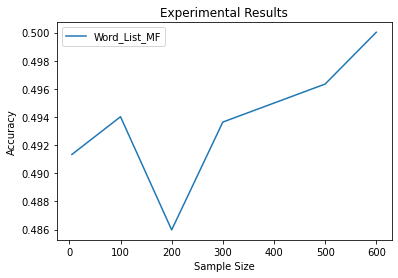

In [ ]:
set_ax1 = Word_List_MF_results.plot(kind="line",title="Experimental Results")
set_ax1.set_ylabel("Accuracy")
set_ax1.set_xlabel("Sample Size")

**Explanation:**
We run our word list based classifier on different sample sizes as 5,100,200,300,500,600 and use the get_train_test_data function to split tarining and testing data. Before passing the data to classifier we normalize our data that is convert all words to lowercase, remove stop words and consider only aplphabetic words and finally apply FreqDist too get the count of each document. After this we split testing documents and labell and train our classifier on training_normalized data and calculate the accuracy of our classifier for each size and store the result in results dictionary.

We plot the graph for accuracy of our classifier versus different sample sizes.

**Conclusion from Graph:**
The graph shows that increasing training data generally help up until a certain point 200.Performance even seems to decrease after this point.There is a drop in the word list classifier results around 500, possibly because we are over-fitting the test set because certain words are introduced or removed.



# **5)b)**

**Explanation:**

I will recommend the Naive Bayes Classifier instead of Word List based classifier because it far better than the word list based classifier. we have created Word List Based classifier on a very simple logic whereas in case of Naive Bayes it is based on conditional probability model of classification.

Formula for Bayes optimal rule is:
It involves calculating the conditional probability of one outcome given another outcome, using the inverse of this relationship, stated as follows:

             P(A | B) = (P(B | A) * P(A)) / P(B)

Naive Bayes handles both continuous and discrete data.In terms of predictors and data points it is highly scalable. Also, it is really fast and can be used to make predictions in real-time .




# **References:**

1)Exsilio Blog. (2016). Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures. [online] Available at: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is.

2) www.turing.com. (n.d.). Precision Recall Method - Outcome for your ML Model. [online] Available at: https://www.turing.com/kb/precision-recall-method [Accessed 10 Nov. 2022].

‌3)Simplilearn.com. (n.d.). Naive Bayes Classifier - Machine Learning [Updated] | Simplilearn. [online] Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier#:~:text=Advantages%20of%20Naive%20Bayes%20Classifier&text=It%20doesn.

